In [1]:
!pip install sklearn
!pip install kaggle

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post11-py3-none-any.whl size=2959 sha256=caf11a517e0c684d808c20b58a6d06b84aa12364b9aee3b12c5f81af7ce264c4
  Stored in directory: /root/.cache/pip/wheels/aa/9c/60/f67813603a52fc35057868f1aba0003cc75b72583dcaa2c341
Successfully built sklearn


In [2]:
import os
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report
from IPython.display import clear_output
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes.'.format(name=fn, length=len(uploaded[fn])))

!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 69 bytes.


In [4]:
!kaggle datasets download -d jarvisgroot/brain-tumor-classification-mri-images
!unzip brain-tumor-classification-mri-images.zip
clear_output()

In [5]:
data_path = '/content/brain_tumor_mri/new_dataset/bt_images'

training_data_path = os.path.join(data_path, '/content/brain_tumor_mri/new_dataset/training_data.pickle')
labels_path = os.path.join(data_path, '/content/brain_tumor_mri/new_dataset/labels.pickle')
test_data_path = os.path.join(data_path, '/content/test_images/test_images')

with open(training_data_path, 'rb') as training_data_file:
    training_data = pickle.load(training_data_file)

with open(labels_path, 'rb') as labels_file:
    labels = pickle.load(labels_file)

In [6]:
from PIL import Image

image_path = '/content/brain_tumor_mri/new_dataset/bt_images/1.jpg'
img = Image.open(image_path)

width, height = img.size

print("Image Width:", width)
print("Image Height:", height)

Image Width: 512
Image Height: 512


In [7]:
training_data = np.array(training_data)
labels = np.array(labels)

<ipython-input-7-02aadbb422b2>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  training_data = np.array(training_data)


In [8]:
training_data.shape

(3064, 2)

In [9]:
labels.shape

(3064,)

In [10]:
unique_labels = np.unique(labels)
print("Unique Label Values:", unique_labels)

Unique Label Values: [1 2 3]


In [11]:
adjusted_labels = labels - 1

In [12]:
unique_labels = np.unique(adjusted_labels)
print("Unique Label Values:", unique_labels)

Unique Label Values: [0 1 2]


In [13]:
file_list = os.listdir(data_path)

In [14]:
image_files = [file for file in file_list if file.lower().endswith(('.jpg', '.png', 'jpeg'))]

In [15]:
image_data = []

for image_file in image_files:
  image_path = os.path.join(data_path, image_file)
  img = Image.open(image_path)

  img = img.convert('RGB')
  img = img.resize((224, 224))
  img_array = np.array(img)

  image_data.append(img_array)

In [16]:
images_array = np.array(image_data)

In [17]:
del image_data

In [18]:
train_images, test_images, train_labels, test_labels = train_test_split(images_array, adjusted_labels, test_size=0.2, random_state=42)

In [19]:
num_classes = len(np.unique(adjusted_labels))
train_labels_categorical = tf.keras.utils.to_categorical(train_labels, num_classes=num_classes)
test_labels_categorical = tf.keras.utils.to_categorical(test_labels, num_classes=num_classes)

In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

batch_size = 32
epochs = 10

history = model.fit(
    train_images,
    train_labels_categorical,
    batch_size = batch_size,
    epochs = epochs,
    validation_data = (test_images, test_labels_categorical)
)

Epoch 1/10
77/77 [==============================] - 22s 68ms/step - loss: 23.8520 - accuracy: 0.3541 - val_loss: 1.1194 - val_accuracy: 0.4258
Epoch 2/10
77/77 [==============================] - 4s 56ms/step - loss: 1.0703 - accuracy: 0.4443 - val_loss: 1.1007 - val_accuracy: 0.4225
Epoch 3/10
77/77 [==============================] - 5s 59ms/step - loss: 1.0249 - accuracy: 0.4810 - val_loss: 1.1247 - val_accuracy: 0.4111
Epoch 4/10
77/77 [==============================] - 4s 56ms/step - loss: 1.0014 - accuracy: 0.5043 - val_loss: 1.1147 - val_accuracy: 0.3866
Epoch 5/10
77/77 [==============================] - 4s 56ms/step - loss: 0.9606 - accuracy: 0.5402 - val_loss: 1.1451 - val_accuracy: 0.3866
Epoch 6/10
77/77 [==============================] - 4s 57ms/step - loss: 0.9114 - accuracy: 0.5573 - val_loss: 1.1927 - val_accuracy: 0.3638
Epoch 7/10
77/77 [==============================] - 4s 55ms/step - loss: 0.8380 - accuracy: 0.6218 - val_loss: 1.2109 - val_accuracy: 0.3556
Epoch 8/10


In [21]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels_categorical, verbose=2)
print("Test accuracy:", test_accuracy)

20/20 - 0s - loss: 1.2839 - accuracy: 0.3409 - 273ms/epoch - 14ms/step
Test accuracy: 0.34094616770744324


In [22]:
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

true_labels = np.argmax(test_labels_categorical, axis=1)

confusion = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix:")
print(confusion)

20/20 [==============================] - 0s 12ms/step
Confusion Matrix:
[[ 27  90  44]
 [ 60 130  79]
 [ 36  95  52]]


In [23]:
predictions = model.predict(test_images)

true_labels = test_labels_categorical[:, 1]

auc = roc_auc_score(true_labels, predictions[:, 1])

print("AUC:", auc)
print("Test accuracy:", test_accuracy)

20/20 [==============================] - 0s 12ms/step
AUC: 0.4655377366646494
Test accuracy: 0.34094616770744324


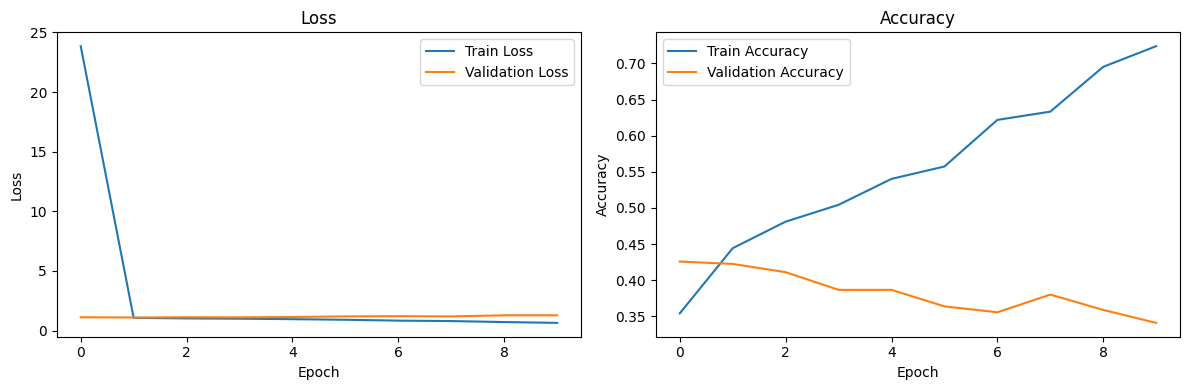

In [24]:
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [25]:
predictions = model.predict(test_images)

true_labels = np.argmax(test_labels_categorical, axis=1)

class_names = ["Pituitary", "Meningioma", "Glioma"]
report = classification_report(
    true_labels,
    np.argmax(predictions, axis=1),
    target_names=class_names
)

print("Classification report:\n", report)

20/20 [==============================] - 0s 12ms/step
Classification report:
               precision    recall  f1-score   support

   Pituitary       0.22      0.17      0.19       161
  Meningioma       0.41      0.48      0.45       269
      Glioma       0.30      0.28      0.29       183

    accuracy                           0.34       613
   macro avg       0.31      0.31      0.31       613
weighted avg       0.33      0.34      0.33       613



In [26]:
max_probabilities = np.max(predictions, axis=1)

for i in range(len(max_probabilities)):
  print(f"Test Image {i + 1} - Confidense: {max_probabilities[i]:.4f}")

Test Image 1 - Confidense: 0.4730
Test Image 2 - Confidense: 0.5247
Test Image 3 - Confidense: 0.5652
Test Image 4 - Confidense: 0.6836
Test Image 5 - Confidense: 0.5261
Test Image 6 - Confidense: 0.4470
Test Image 7 - Confidense: 0.8837
Test Image 8 - Confidense: 0.5815
Test Image 9 - Confidense: 0.5127
Test Image 10 - Confidense: 0.5095
Test Image 11 - Confidense: 0.7872
Test Image 12 - Confidense: 0.4349
Test Image 13 - Confidense: 0.6983
Test Image 14 - Confidense: 0.4288
Test Image 15 - Confidense: 0.4364
Test Image 16 - Confidense: 0.4077
Test Image 17 - Confidense: 0.6343
Test Image 18 - Confidense: 0.5515
Test Image 19 - Confidense: 0.5884
Test Image 20 - Confidense: 0.4776
Test Image 21 - Confidense: 0.4419
Test Image 22 - Confidense: 0.6565
Test Image 23 - Confidense: 0.5594
Test Image 24 - Confidense: 0.4292
Test Image 25 - Confidense: 0.5235
Test Image 26 - Confidense: 0.4561
Test Image 27 - Confidense: 0.3673
Test Image 28 - Confidense: 0.7225
Test Image 29 - Confidense: 0